# Feature Importance EDA
The following notebook performs a feature importance analysis on the dataset. The work stemmed from this notebook will contribute towards the identification of key features that will be used to develop the predictive models.

In [61]:
import corner
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.io import ascii
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

In [2]:
# Load Dataset
raw_data = ascii.read('../data/raw/plti/kplr_dr25_inj1_plti.txt')
df = raw_data.to_pandas()
df.dropna()

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2961: TableReplaceWarning: converted column 'Fit_Provenance' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,KIC_ID,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,...,TCE_ID,Measured_MES,r_period,r_epoch,r_depth,r_dur,r_b,r_ror,r_dor,Fit_Provenance
0,11445144,8,70.0385,107.4886,0.9808,1662.0,4.02030,0.4141,0.0306,126.498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11496840,8,87.8829,103.9753,0.9808,1561.0,2.20705,0.7649,0.0350,214.397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11497236,8,88.3020,84.4552,0.9808,1332.0,2.11234,0.8100,0.0334,207.336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11548779,8,35.4942,73.9562,2.9425,686.0,1.00655,0.8915,0.0247,138.661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11600744,8,48.8212,97.2396,23.2943,372.0,1.77915,0.8738,0.0183,110.768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Extract Key Features
feat = ['Sky_Group', 'i_period', 'i_epoch', 'N_Transit', 'i_depth', 'i_dur', 'i_b', 'i_ror', 'i_dor', 'Recovered']
features = raw_data[feat].to_pandas()

features.head()

,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,Recovered
0,8,70.0385,107.4886,0.9808,1662.0,4.02030,0.4141,0.0306,126.498,0
1,8,87.8829,103.9753,0.9808,1561.0,2.20705,0.7649,0.0350,214.397,0
2,8,88.3020,84.4552,0.9808,1332.0,2.11234,0.8100,0.0334,207.336,0
3,8,35.4942,73.9562,2.9425,686.0,1.00655,0.8915,0.0247,138.661,0
4,8,48.8212,97.2396,23.2943,372.0,1.77915,0.8738,0.0183,110.768,0


## Pairwise Matrix Plots

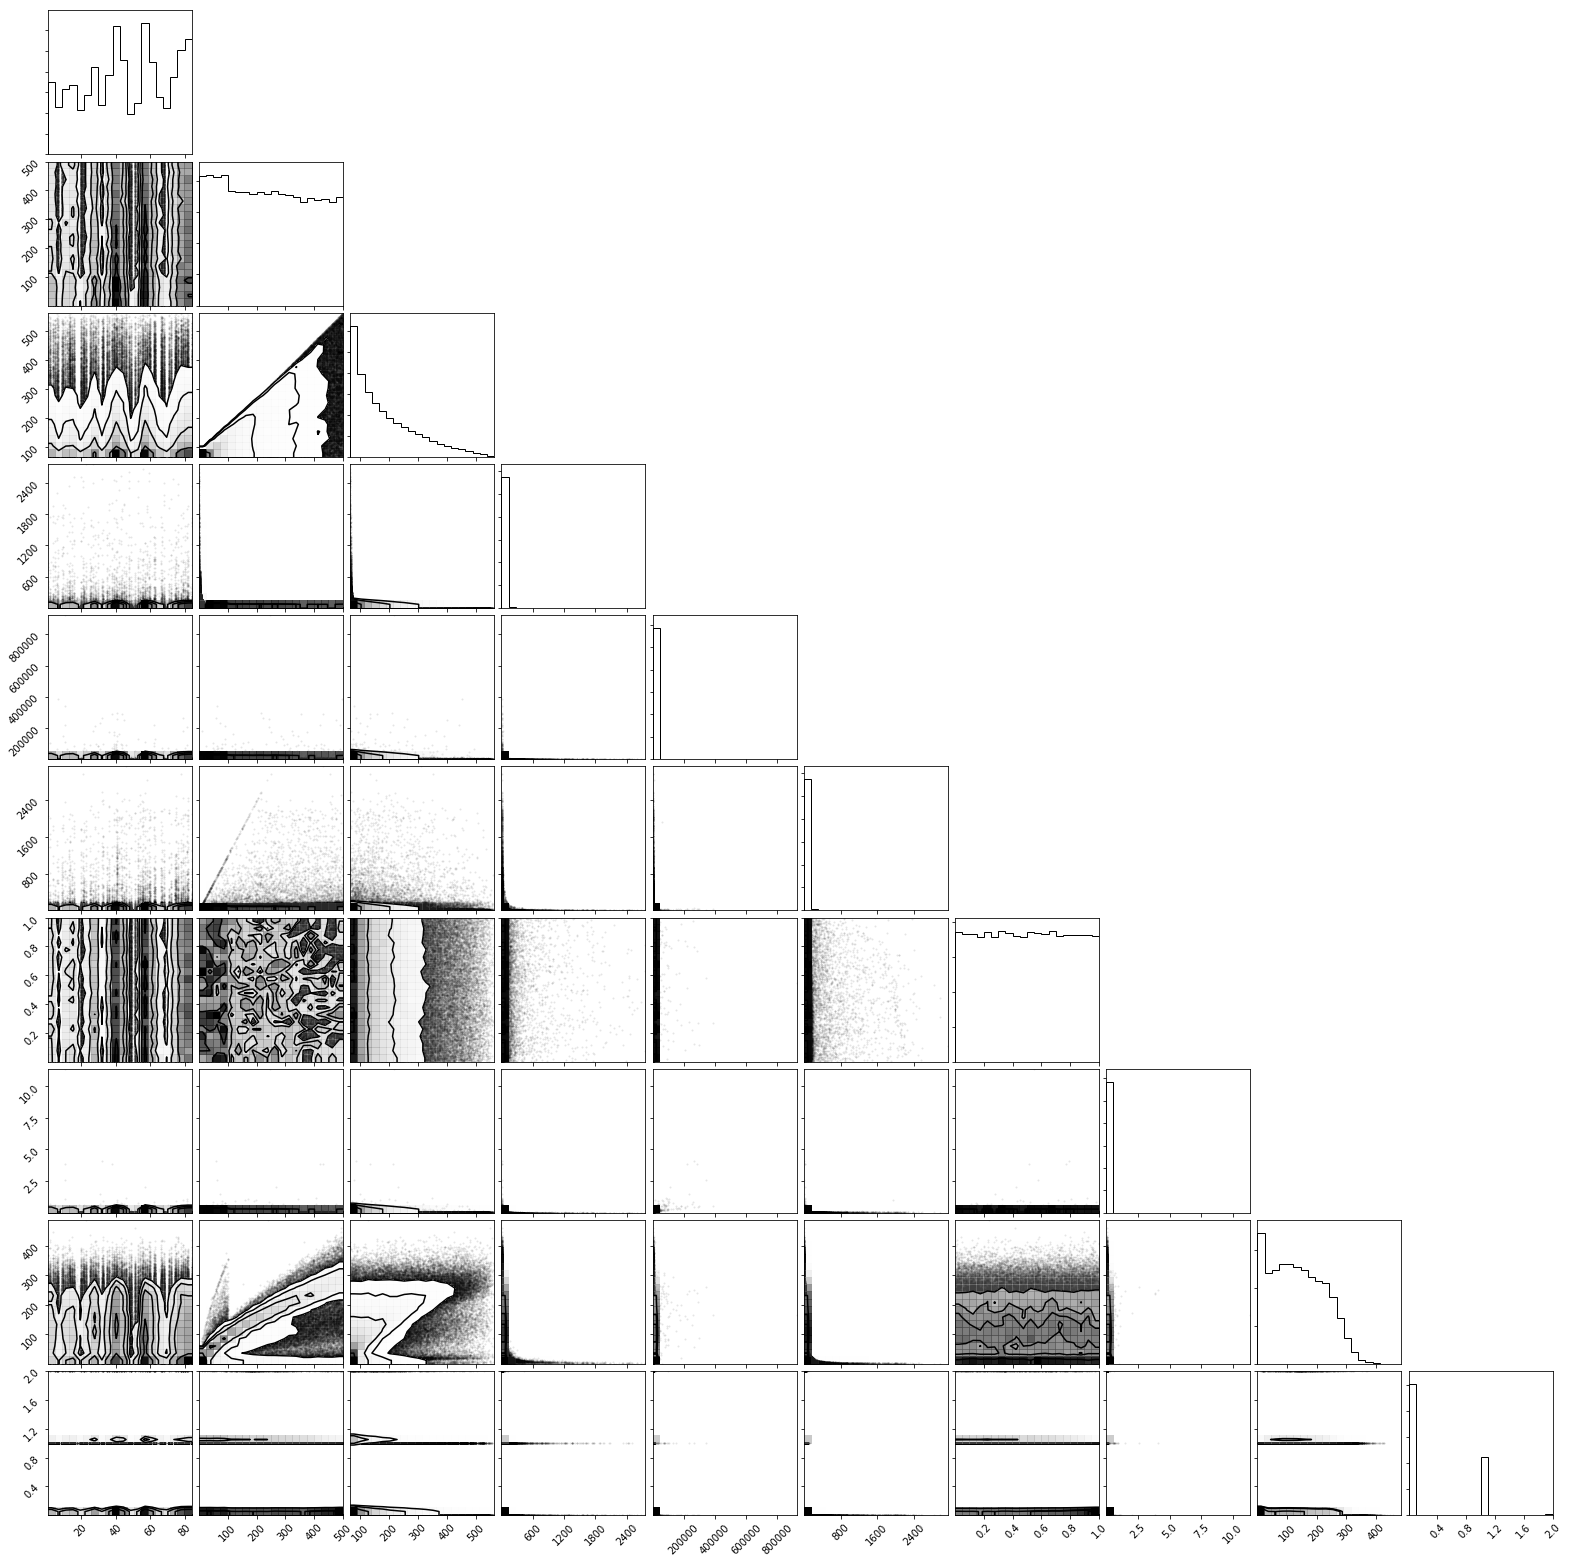

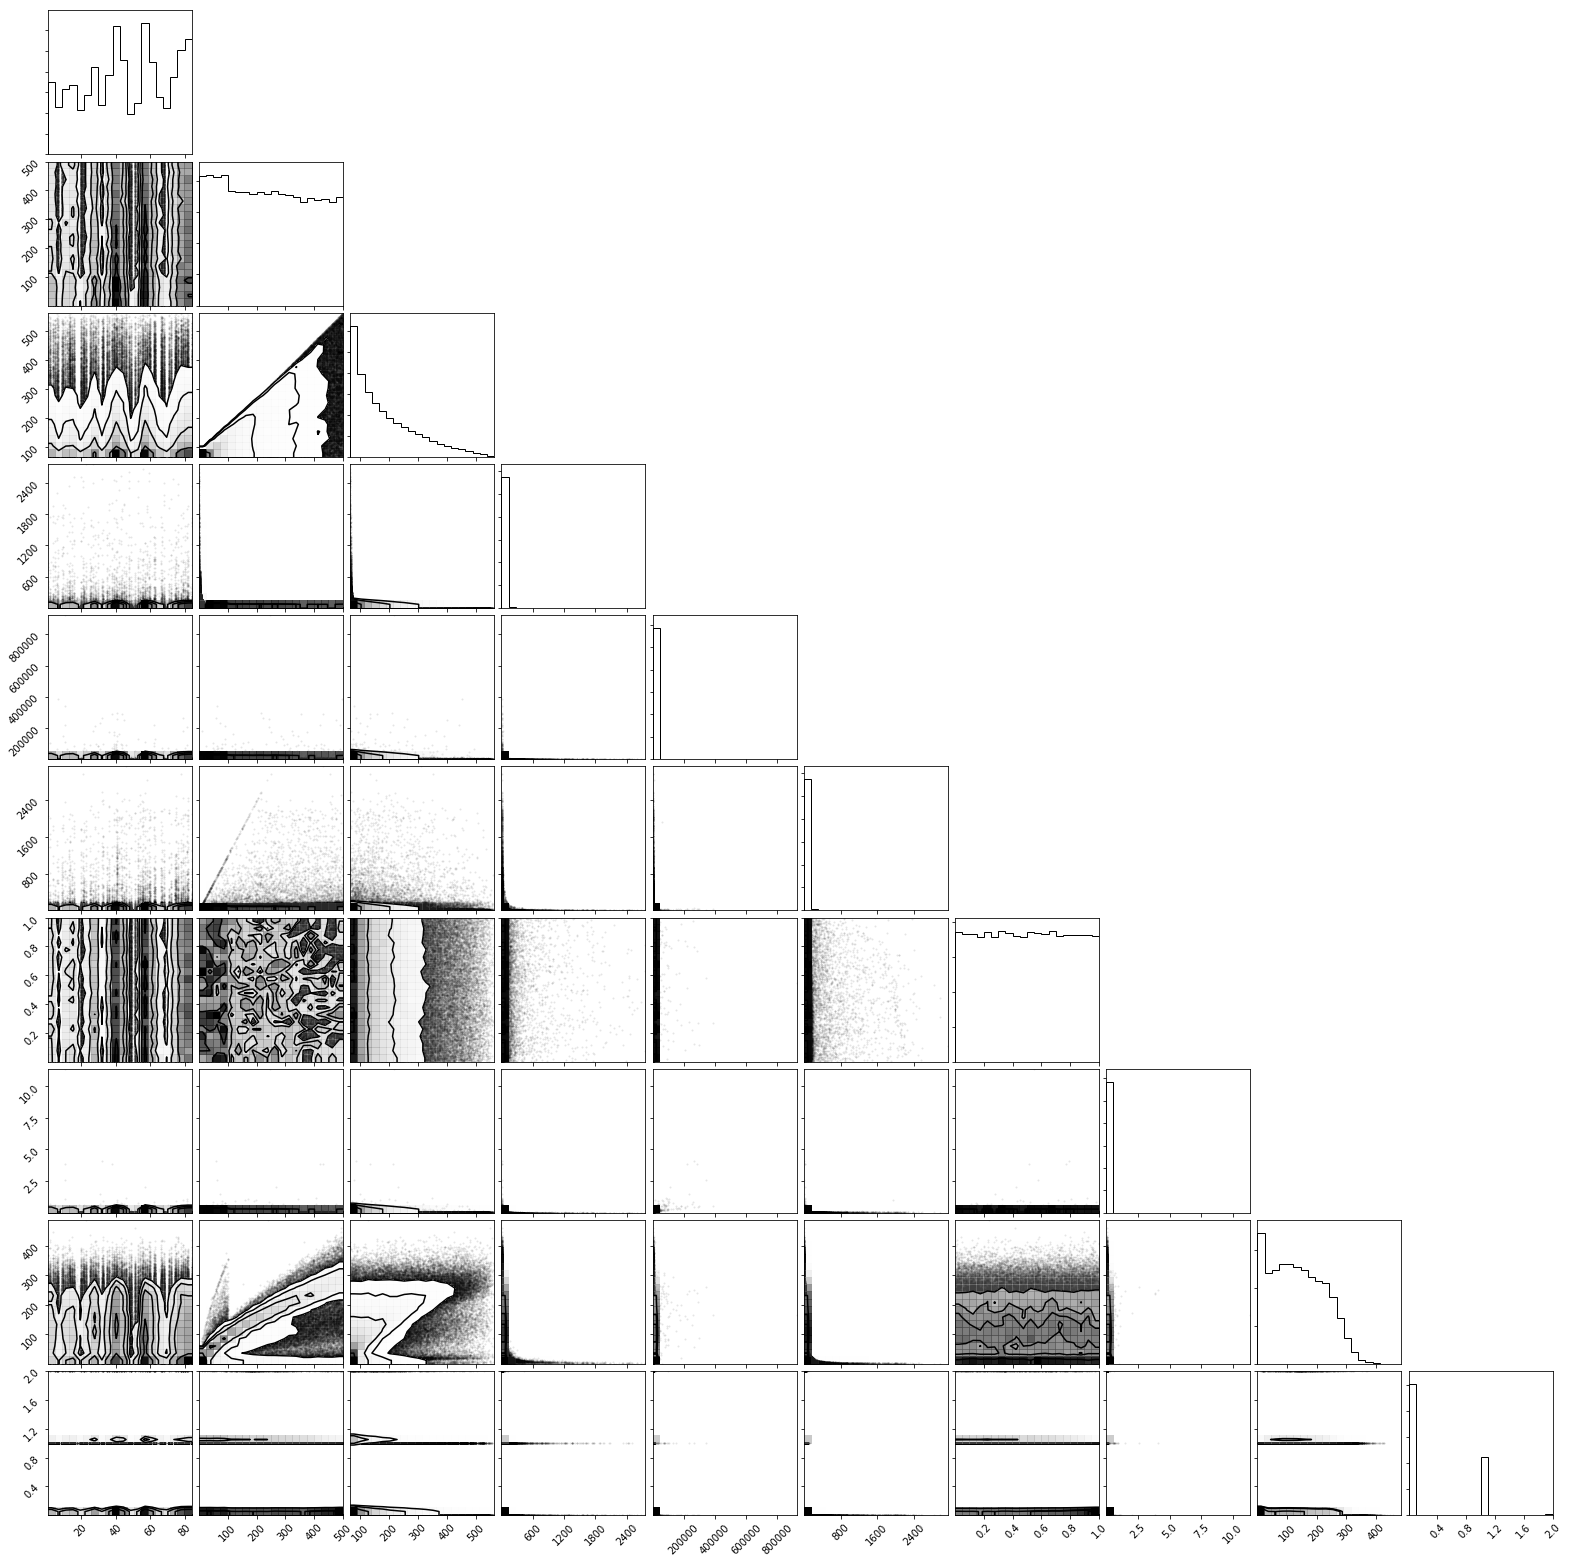

In [4]:
corner.corner(features.values)

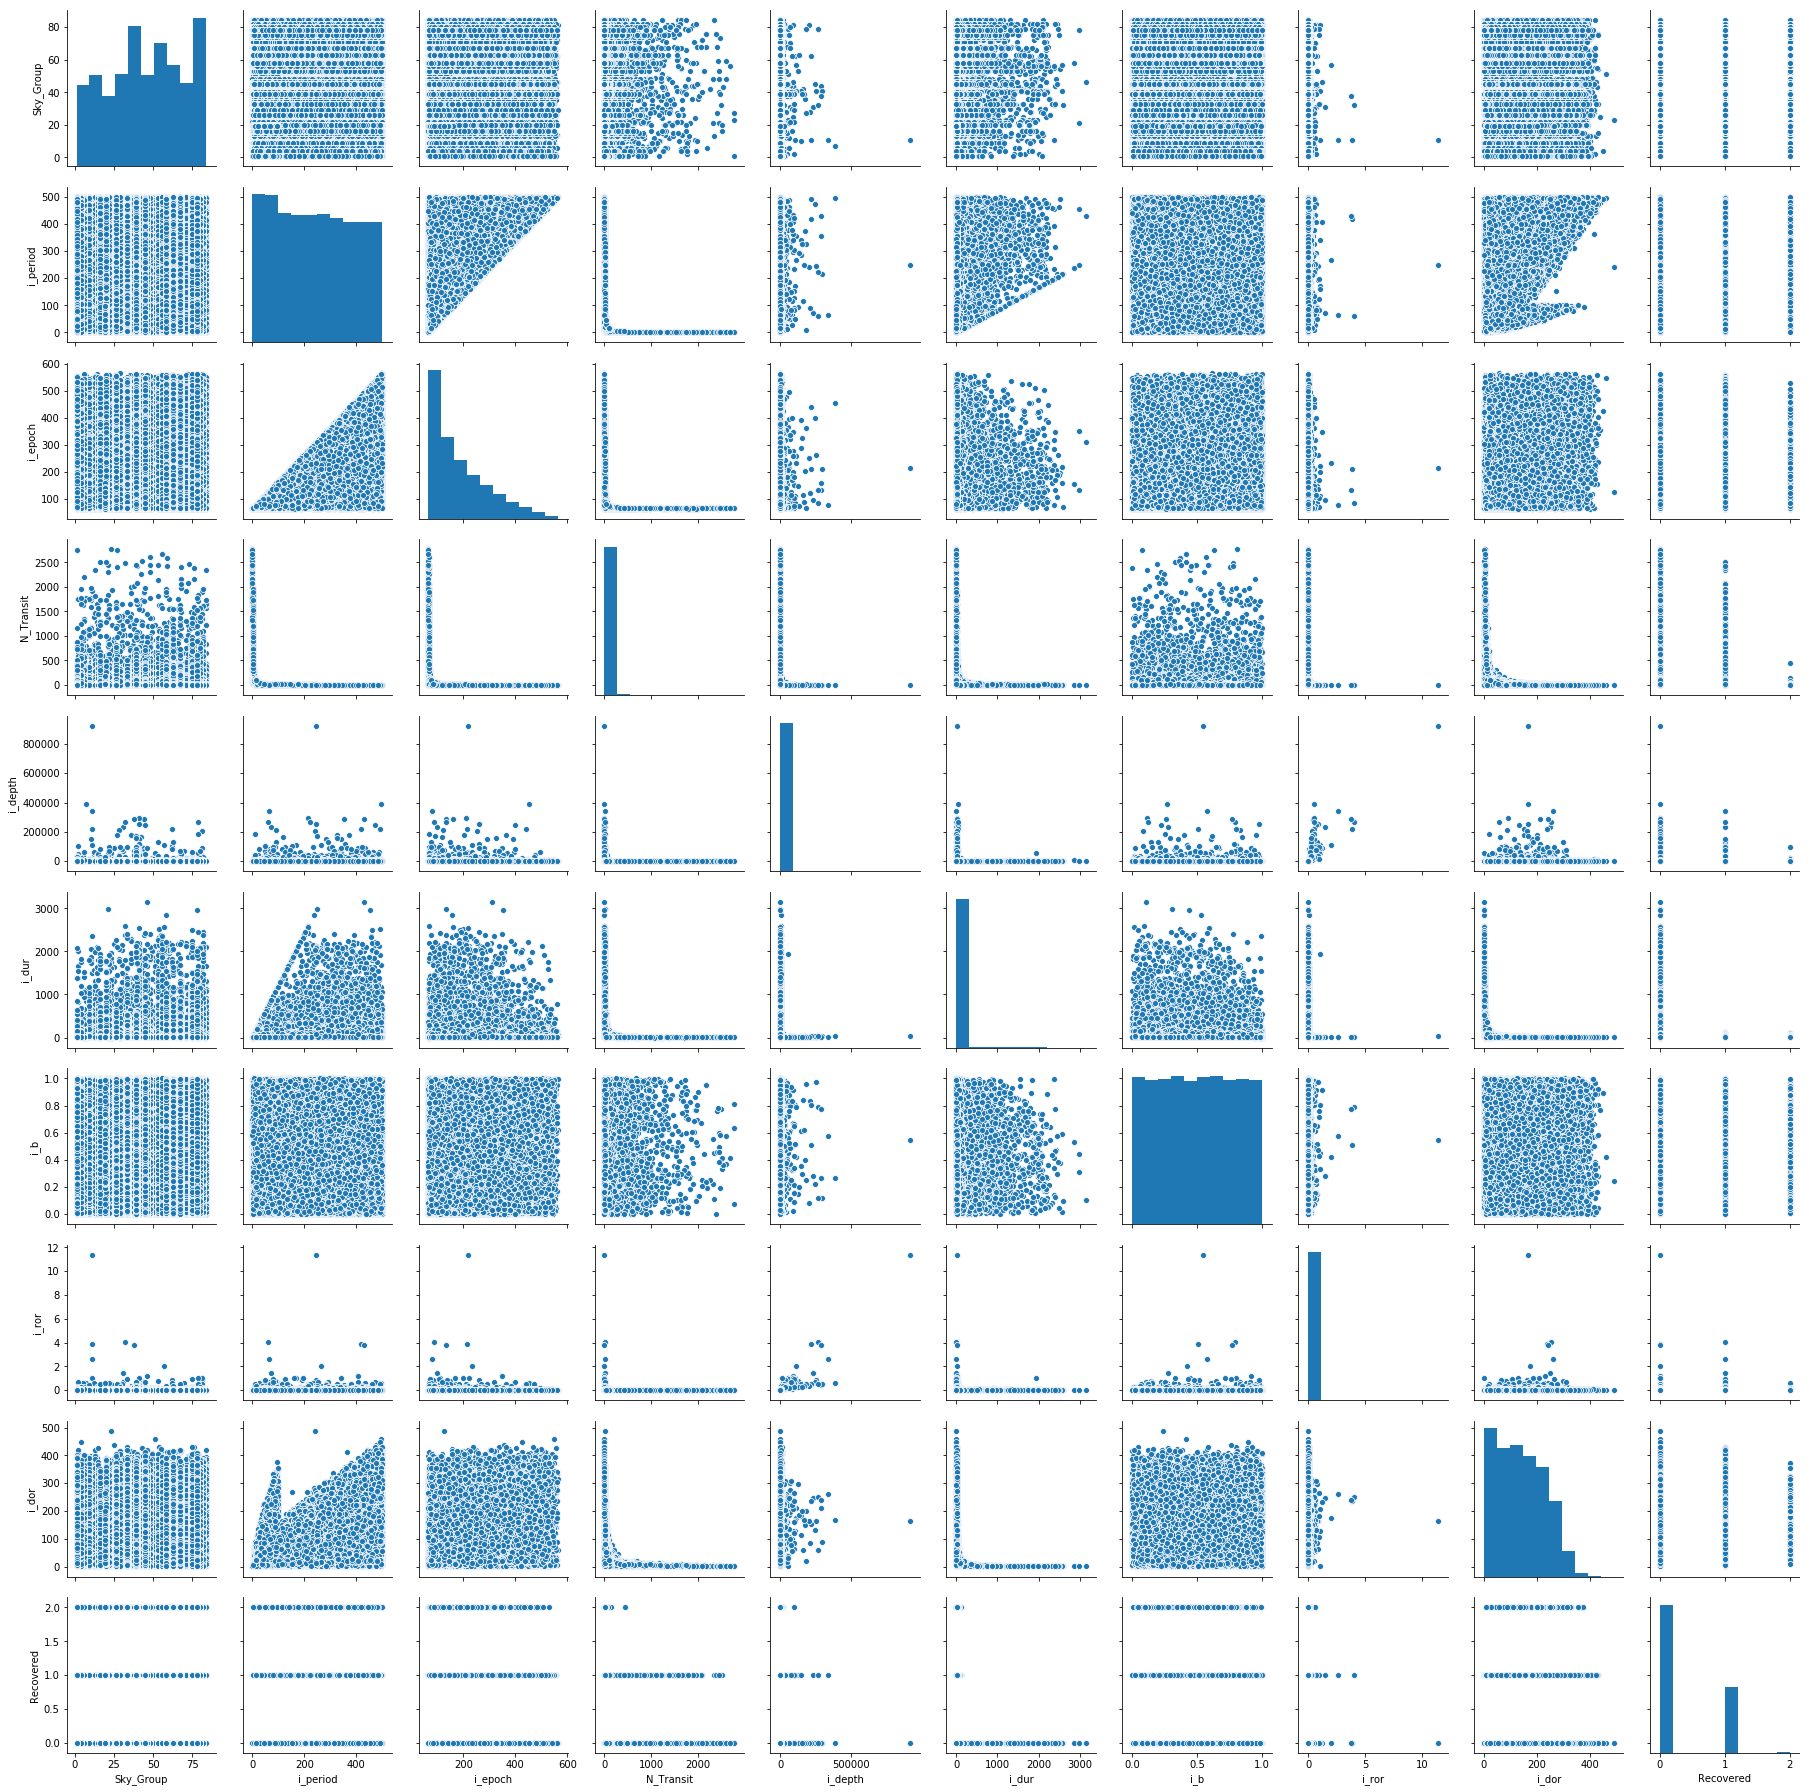

In [8]:
sns.pairplot(features)
plt.show()

## Feature-Wise Correlation Plot

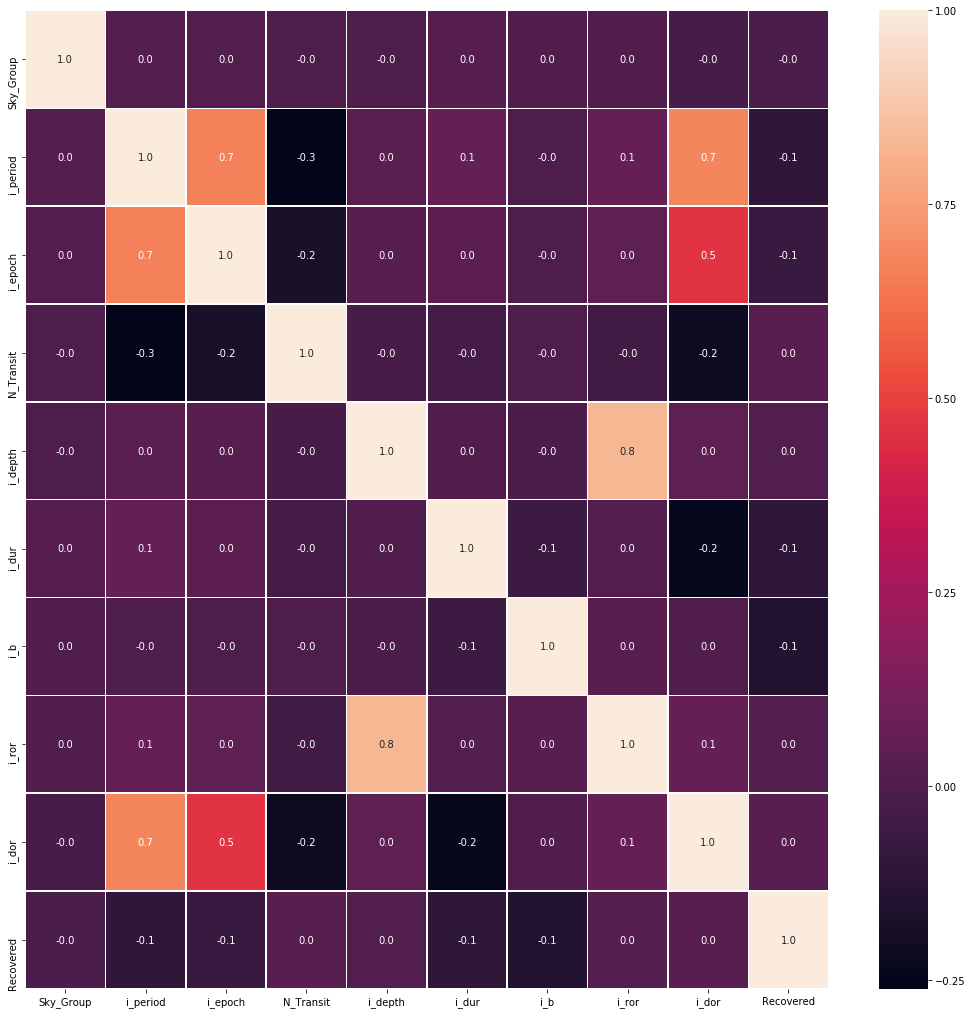

In [12]:
# Extract Key Features (w/o Target Value)
feat = ['Sky_Group', 'i_period', 'i_epoch', 'N_Transit', 'i_depth', 'i_dur', 'i_b', 'i_ror', 'i_dor', 'Recovered']
features = raw_data[feat].to_pandas()

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Feature Variance Inflation Factor

In [50]:
def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc) + '\tMAXLOC: ' + str(max(vif)))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [55]:
key_var = calculate_vif_(features, thresh=3)

dropping 'i_period' at index: 1	MAXLOC: 11.078135129969713
dropping 'i_epoch' at index: 1	MAXLOC: 4.711368249181517
dropping 'i_ror' at index: 5	MAXLOC: 4.045658420092005
dropping 'Sky_Group' at index: 0	MAXLOC: 3.20389559037814
Remaining variables:
Index(['N_Transit', 'i_depth', 'i_dur', 'i_b', 'i_dor', 'Recovered'], dtype='object')
